# Questions to answer:
- The data-set aims to answer the following key questions:

    - 1- Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 
    - 2- Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
    - 3- How does Infant and Adult mortality rates affect life expectancy?
    - 4- Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
    - 5- What is the impact of schooling on the lifespan of humans?
    - 6- Does Life Expectancy have positive or negative relationship with drinking alcohol?
    - 7- Do densely populated countries tend to have lower life expectancy?
    - 8- What is the impact of Immunization coverage on life Expectancy?

## Notes:
- The data-set related to life expectancy, health factors for 193 countries
- The result indicated that most of the missing data was for population, Hepatitis B and GDP.
- The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc.
- Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of **22 Columns and 2938 rows** which meant **20 predicting variables.**
- All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore', category=Warning)  # Ignore all warnings

In [3]:
data = pd.read_csv("Life Expectancy Data.csv")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Data Cleaning

In [11]:
data.columns = data.columns.str.strip()

In [12]:
for col in data.columns:
    print(str(data[col].value_counts()))
    print("-----------------------------------------")

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
-----------------------------------------
Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
-----------------------------------------
Status
Developing    2426
Developed      512
Name: count, dtype: int64
-----------------------------------------
Life expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64
-----------------------------------------
Adult M

In [13]:
data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

- **Comments:**
    - There is no duplicated values
    - Only 2 categorical Columns and 20 Numerical Columns

# Missing Values Distribution

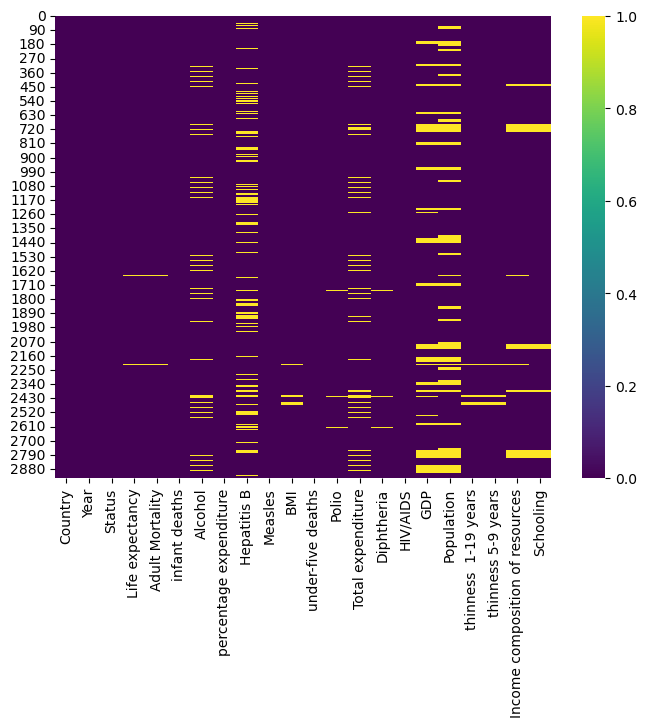

In [14]:
plt.figure(figsize=(8, 6));
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()

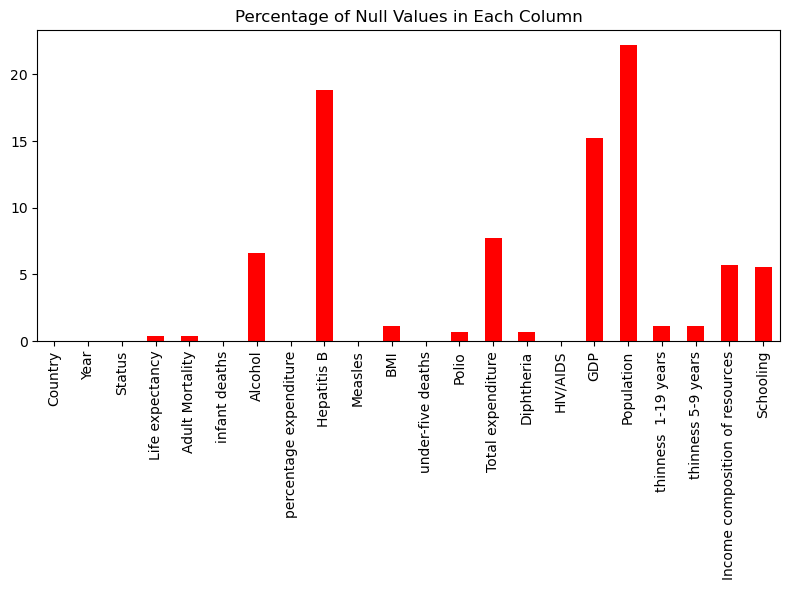

In [15]:
# Calculate the percentage of null values in each column
null_percentages = data.isnull().mean(axis=0) * 100

plt.figure(figsize=(8, 6))
null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
# plt.ylabel('Null Value Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- **Comments:**
    - Columns `Hepatitis B`, `GDP` and `Population` have the most number of missing values
    - Most of the missing values in other columns are randomly that has no pattern

In [16]:
# Impute missing values with the mean of each column
for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mean())

# data[num_columns] = data[num_columns].fillna(data[num_columns].mean())

In [17]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
cat_columns = []
num_columns =[]

for col in data.columns:
    if data[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(cat_columns)
print(num_columns)

['Country', 'Status']
['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


# Exploring Outliers

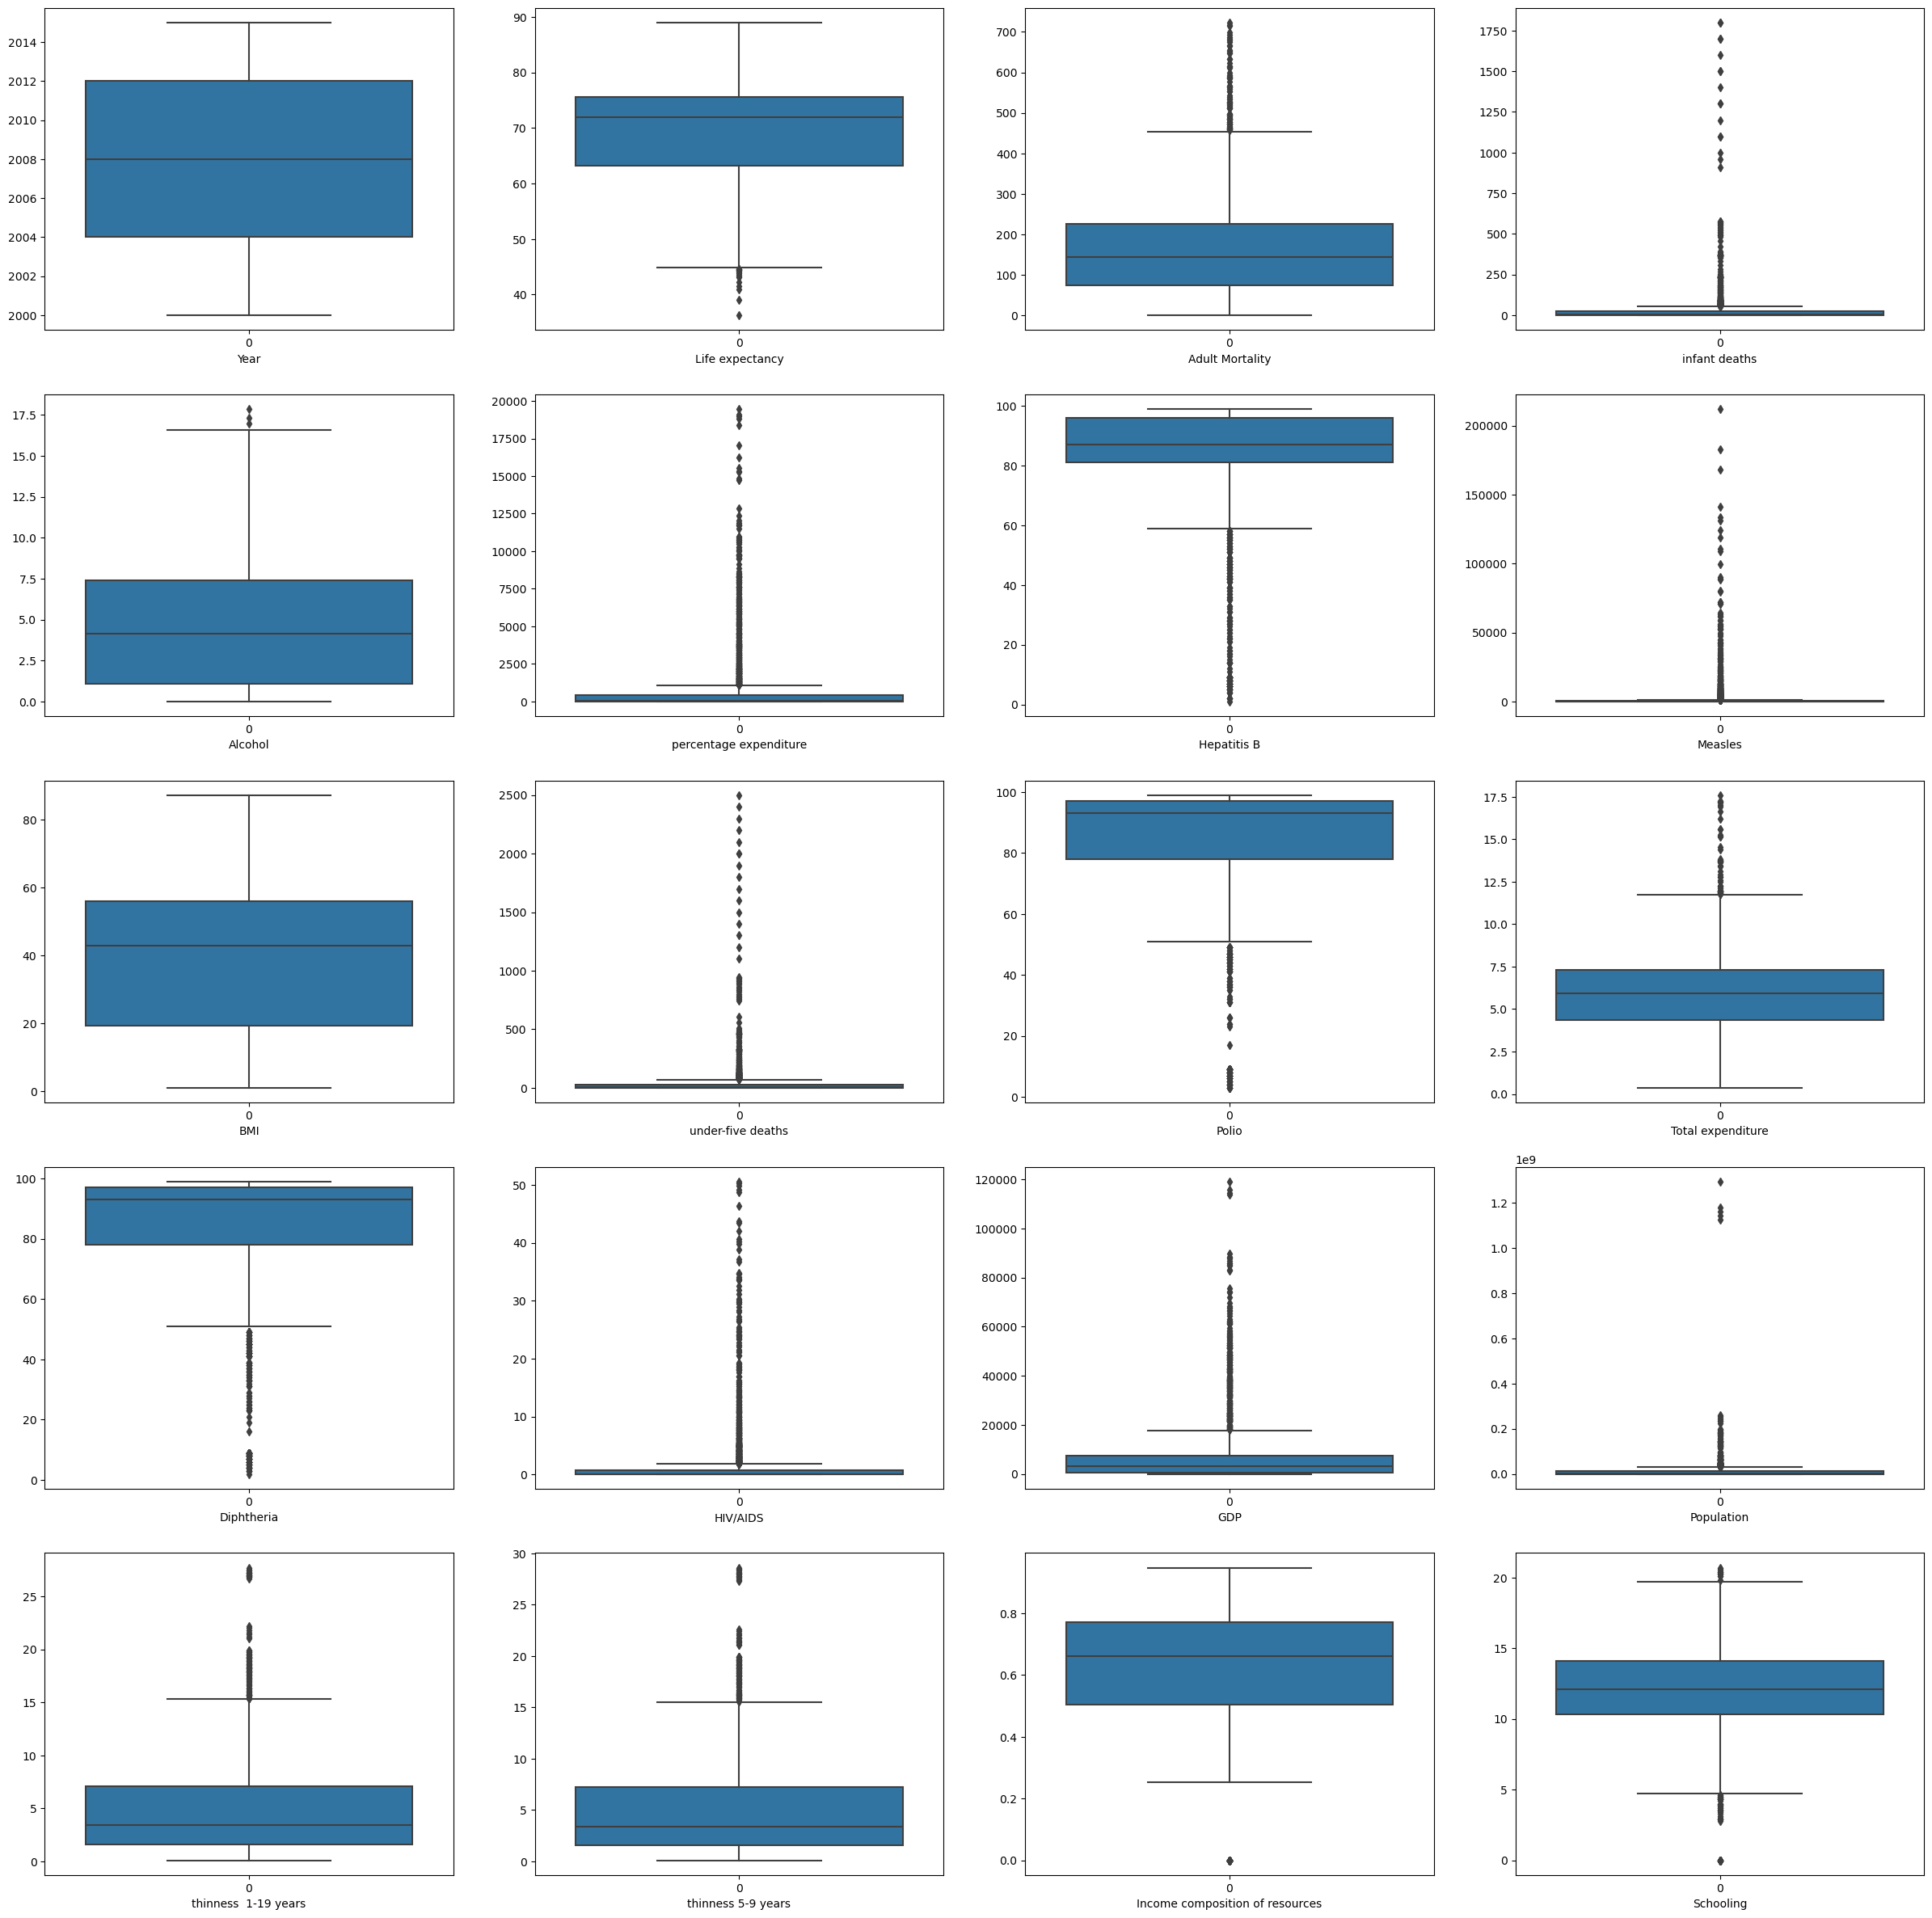

In [19]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.boxplot(data=data[col])
    plt.xlabel(col)
    counter = counter + 1

In [20]:
# Function to detect outliers using IQR approach
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

In [21]:
# Calculate and store outlier counts and percentages
outlier_data = {}
for col in num_columns:
    outliers = detect_outliers(data[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(data[col])) * 100  # Calculate percentage
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}
    
    print(col)
    print("No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

Year
No. of IQR-based outliers: 0
--------------------------------
Life expectancy
No. of IQR-based outliers: 17
--------------------------------
Adult Mortality
No. of IQR-based outliers: 86
--------------------------------
infant deaths
No. of IQR-based outliers: 315
--------------------------------
Alcohol
No. of IQR-based outliers: 3
--------------------------------
percentage expenditure
No. of IQR-based outliers: 389
--------------------------------
Hepatitis B
No. of IQR-based outliers: 316
--------------------------------
Measles
No. of IQR-based outliers: 542
--------------------------------
BMI
No. of IQR-based outliers: 0
--------------------------------
under-five deaths
No. of IQR-based outliers: 394
--------------------------------
Polio
No. of IQR-based outliers: 279
--------------------------------
Total expenditure
No. of IQR-based outliers: 51
--------------------------------
Diphtheria
No. of IQR-based outliers: 298
--------------------------------
HIV/AIDS
No. of IQ

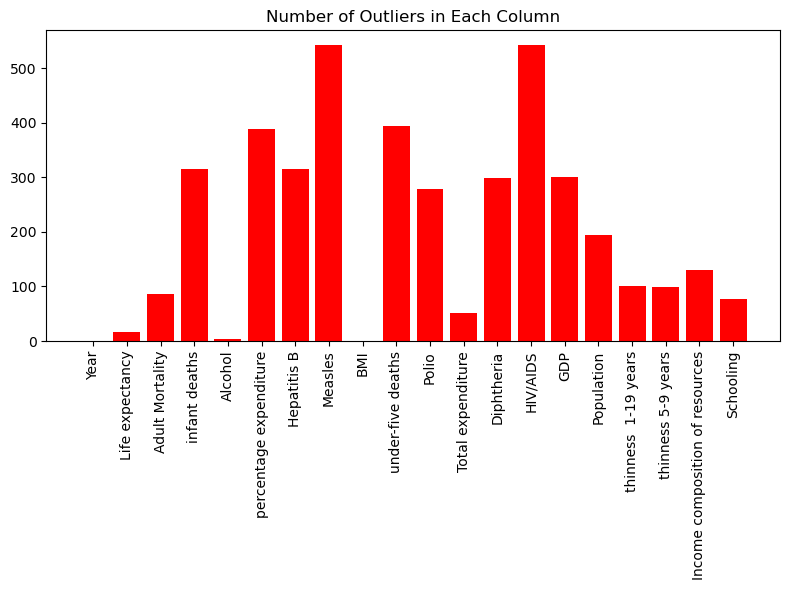

In [22]:
# Plot outlier counts
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
plt.title('Number of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

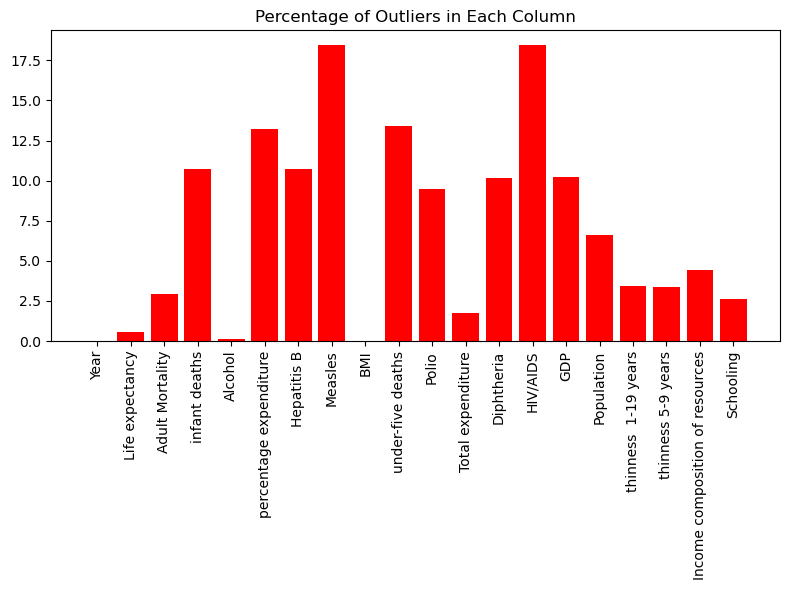

In [23]:
# Plot outlier percentages
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='red')
plt.title('Percentage of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Dealing with Outliers

In [24]:
# Replace outliers with column means (handle missing values appropriately)
for col in num_columns:
    outliers = detect_outliers(data[col])
    if outliers:  # Check if there are outliers before replacing
        mean_value = data[col].mean()  # Calculate mean (consider handling missing values)
        data.loc[data[col].isin(outliers), col] = mean_value  # Replace outliers with mean

# Data Visualization

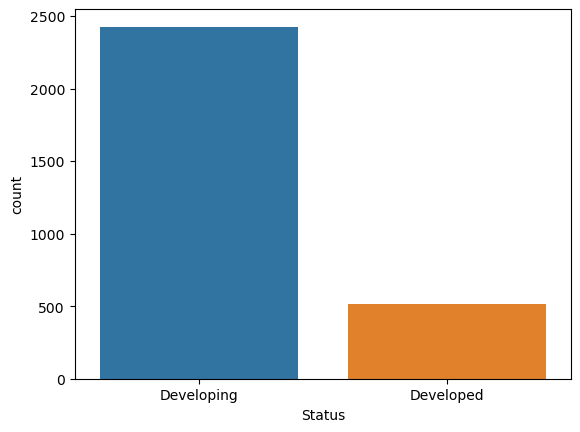

In [25]:
g = sns.countplot(x="Status",data=data)
plt.xticks()
plt.show()

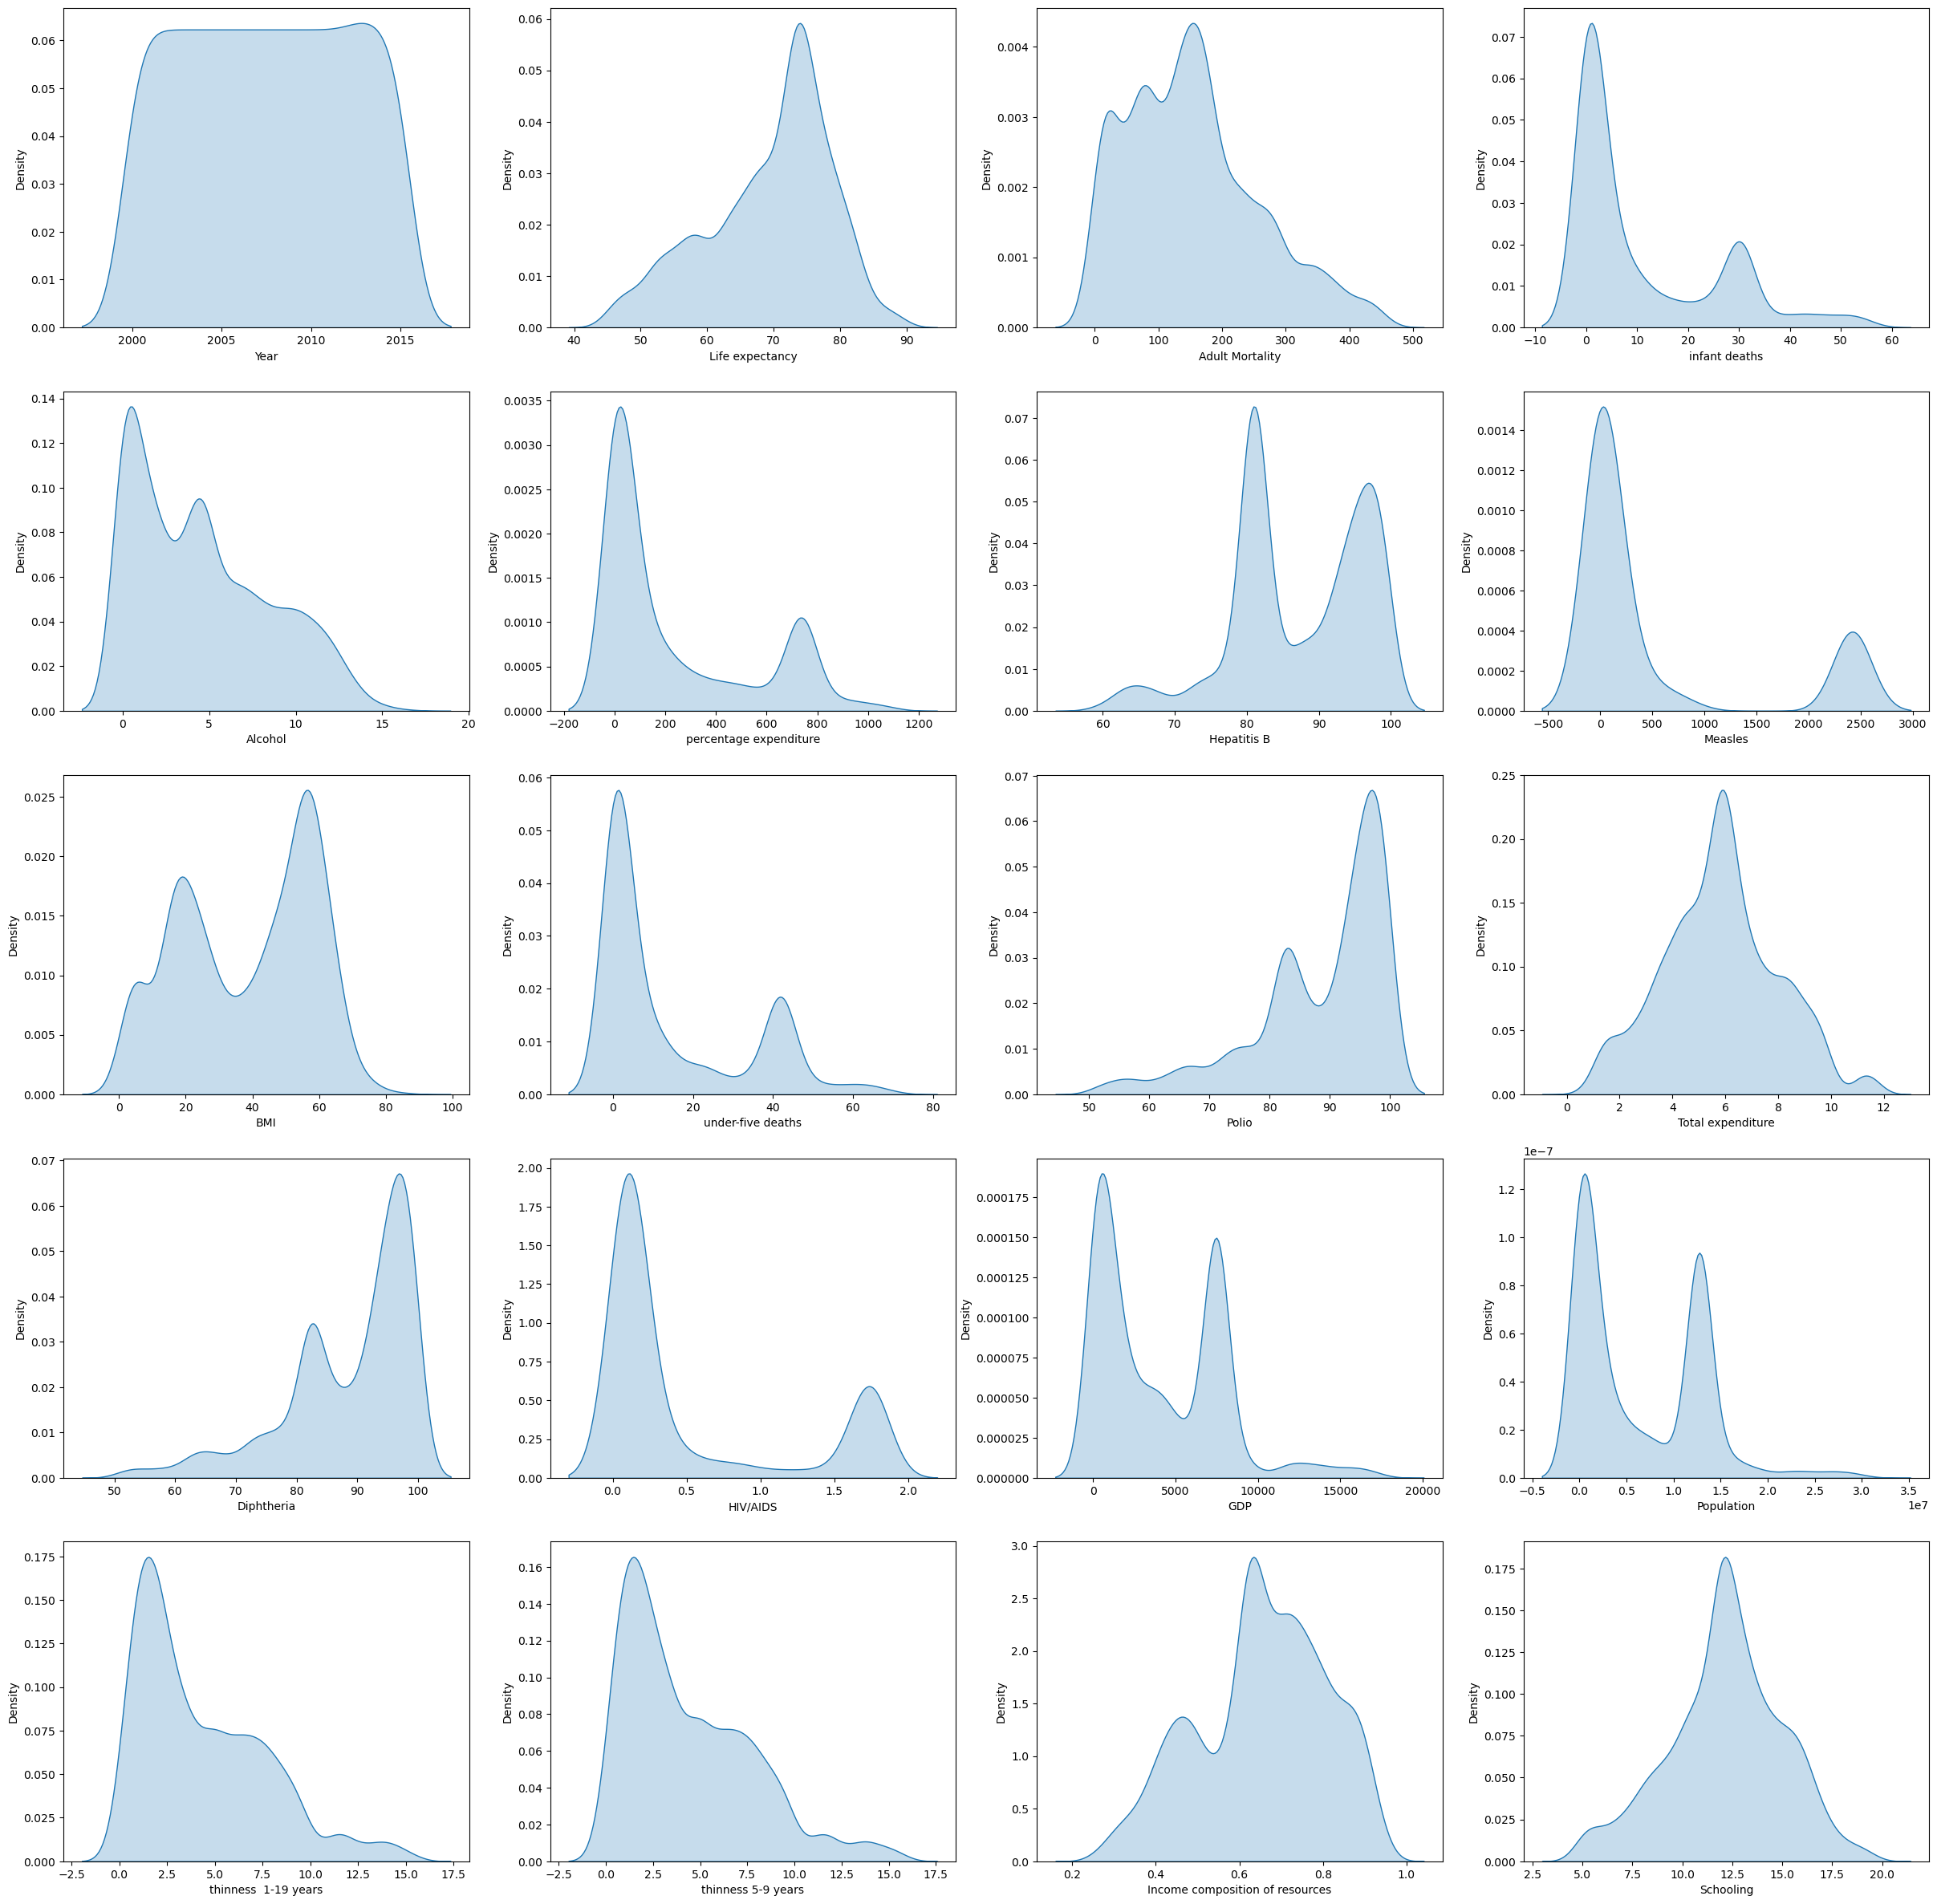

In [26]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True)
    plt.xticks()
    counter = counter + 1

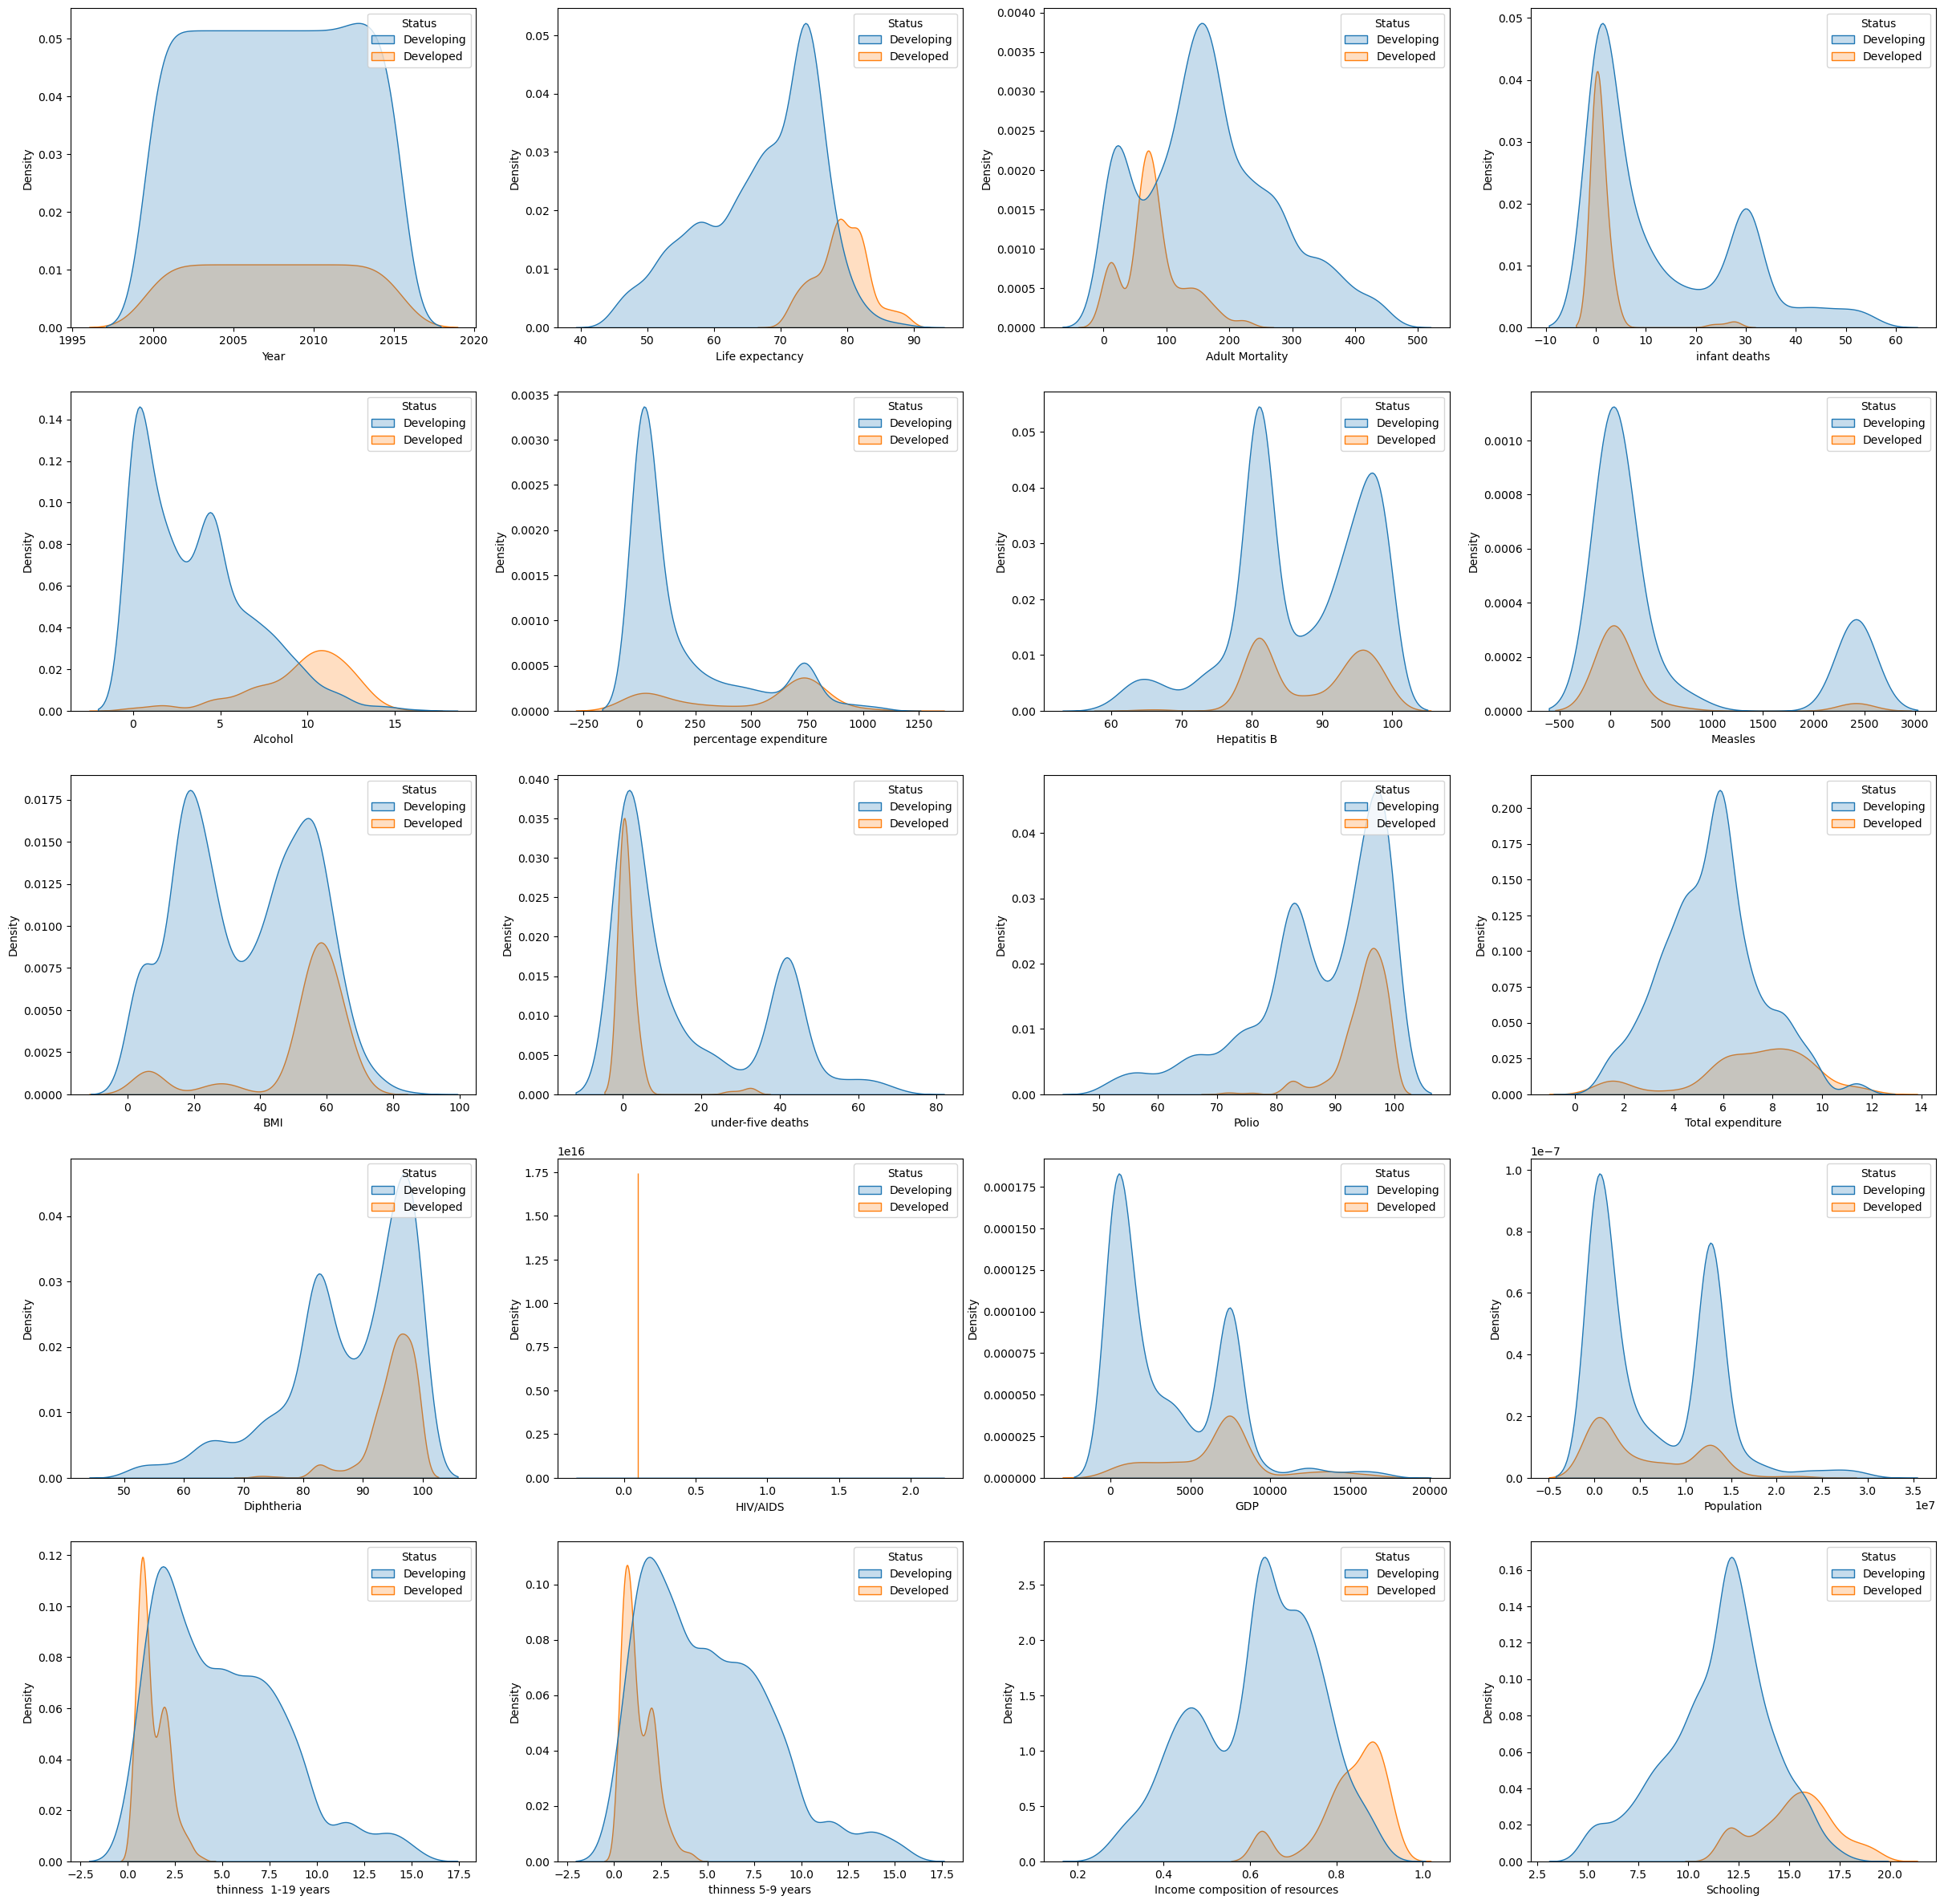

In [27]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True,hue="Status")
    plt.xticks()
    counter = counter + 1

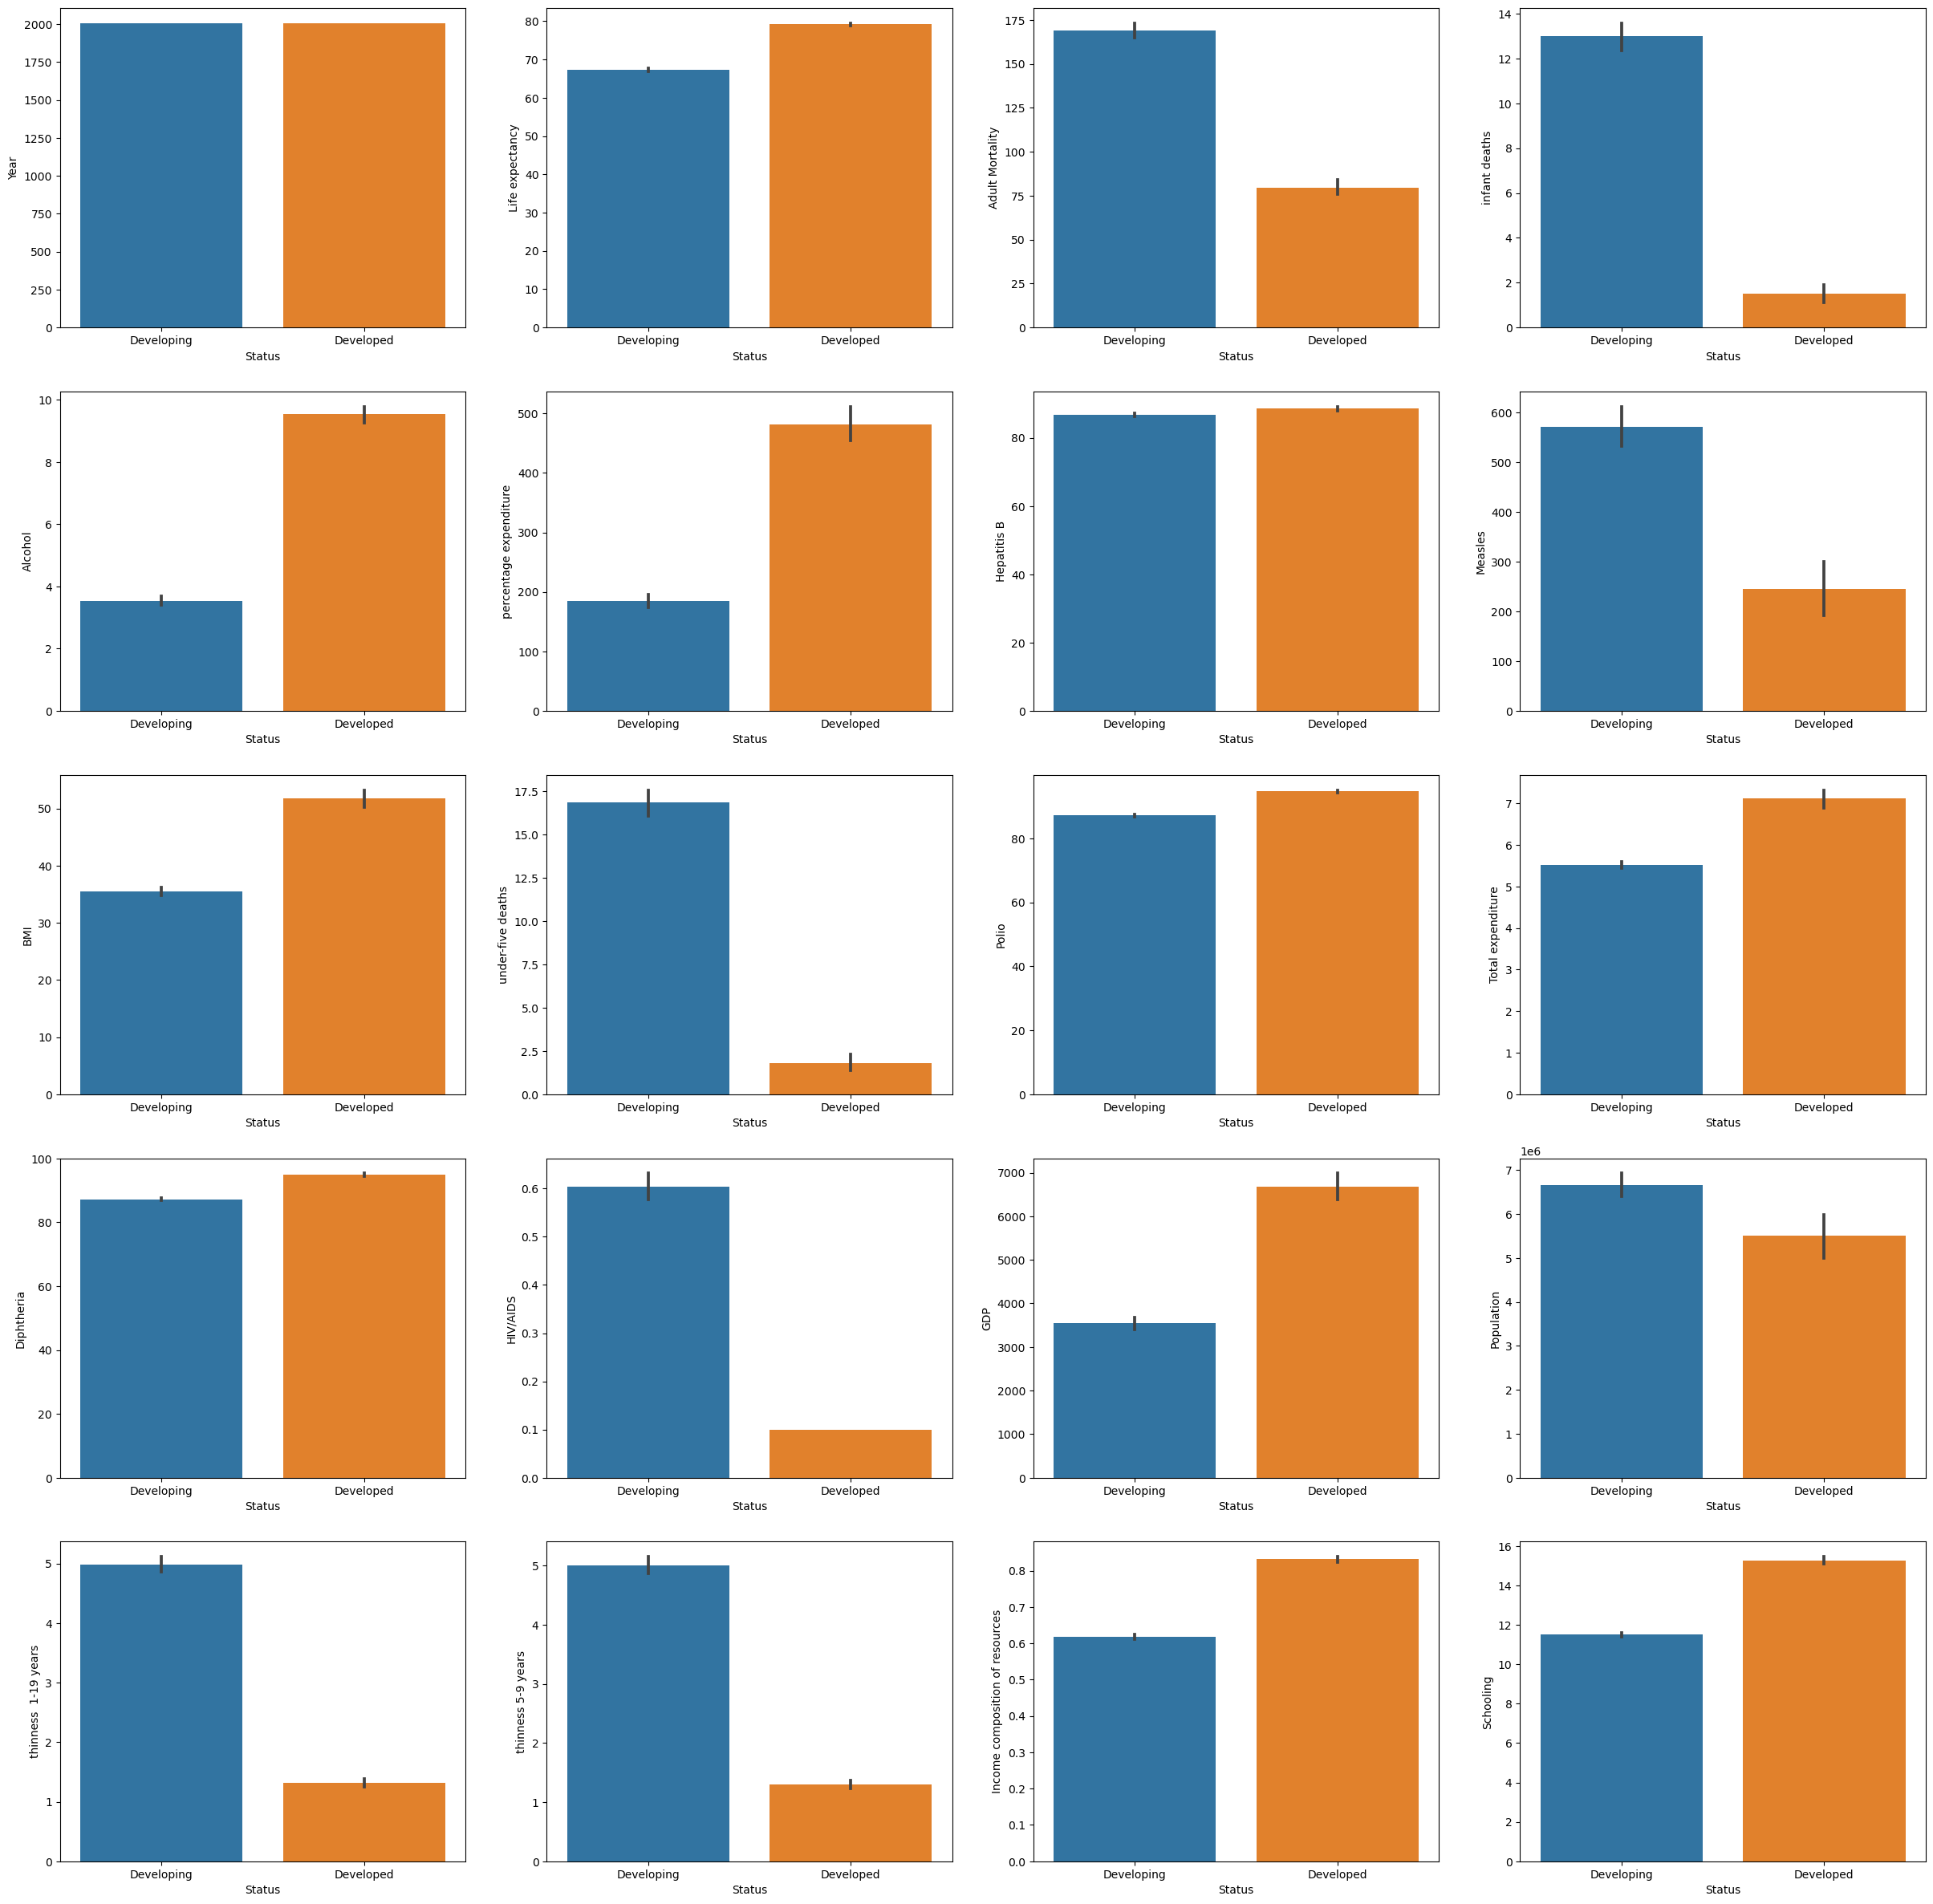

In [28]:
fig = plt.figure(figsize=(30,30))

counter = 0

for i in data.columns:
    if (data[i].dtype != 'object'):
        sub = fig.add_subplot(5,4,counter+1)
        g = sns.barplot(y=i,data=data,x='Status')
        plt.xticks()
        counter = counter + 1

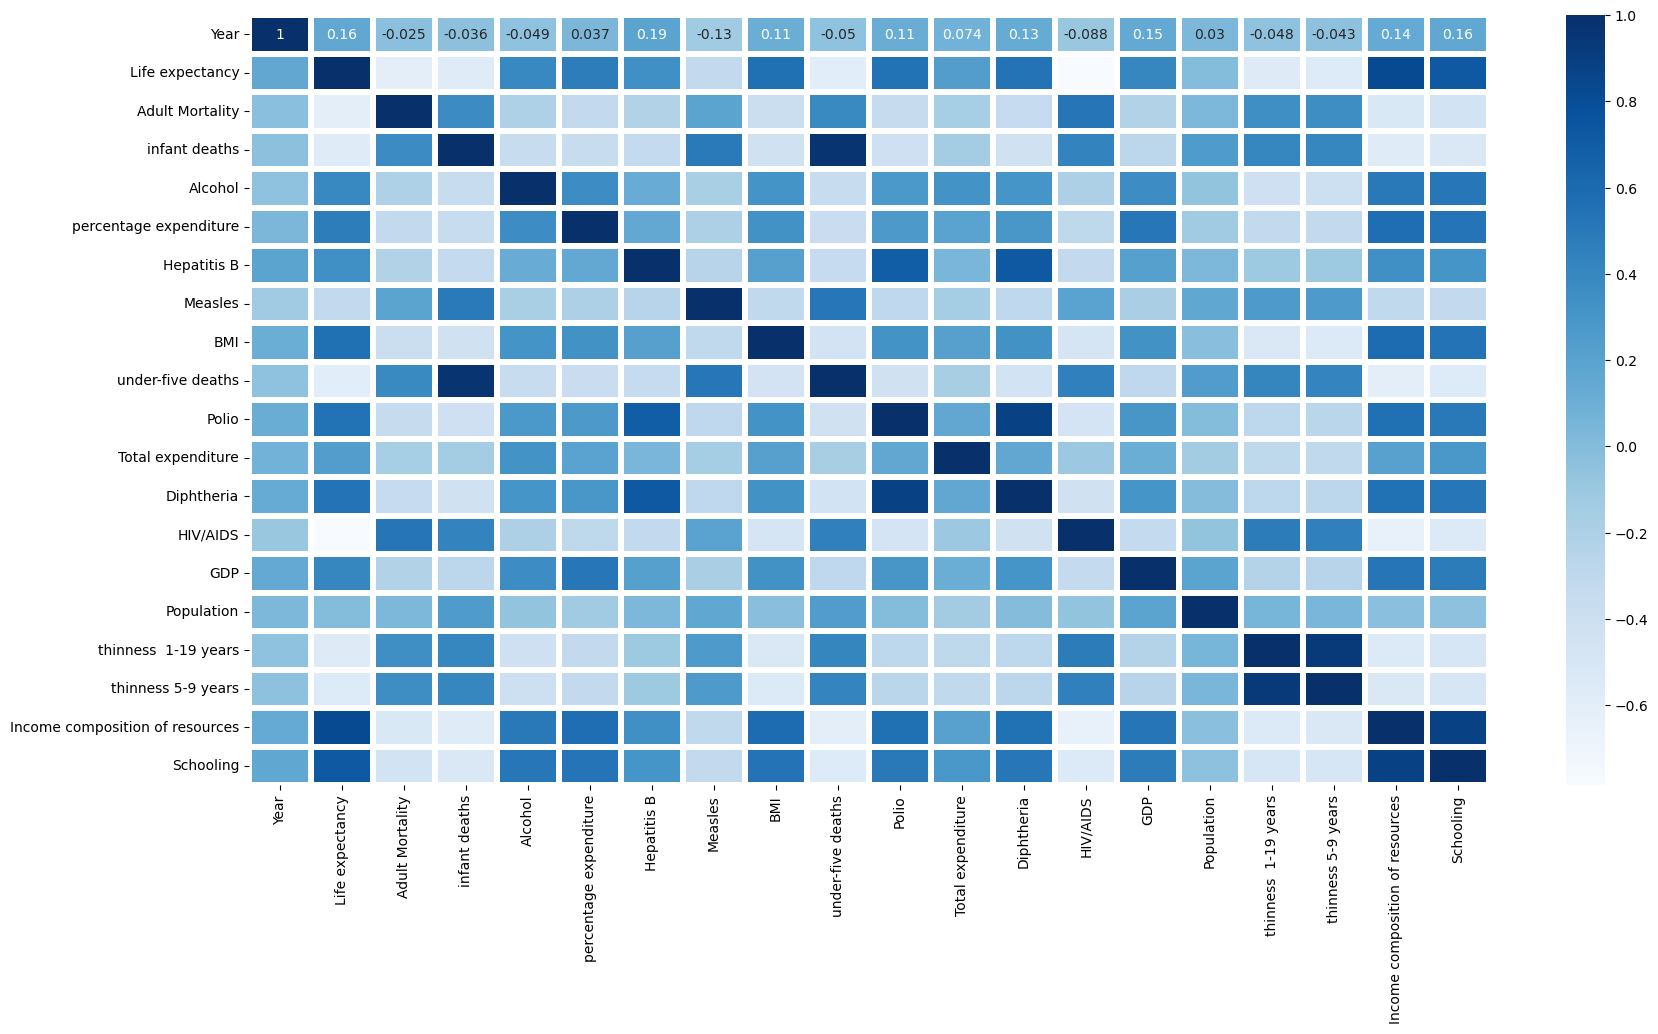

In [29]:
plt.figure(figsize = (20,10))

sns.heatmap(data[num_columns].corr(), cmap='Blues' ,linewidths= 3,annot = True)
plt.show()

- **Comments:**
    - There is a high correlation between `thinness 1-19 years` and `thinnes 5-9 years`, so we can drop one of them
    - There is a high correlation between `under-five deaths` and `infant deaths`, so we can drop one of them
    - There is a high correlation between `Income composition of resources` and `Schooling`
    - There is a high correlation between `Diphtheria` and `Polio`

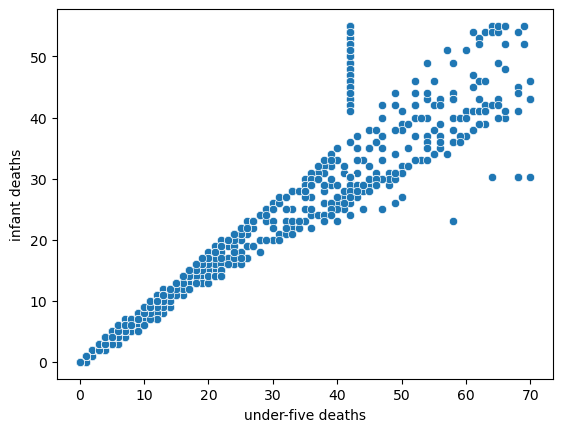

In [30]:
sns.scatterplot(x ='under-five deaths' , y = 'infant deaths' , data = data )
plt.show()

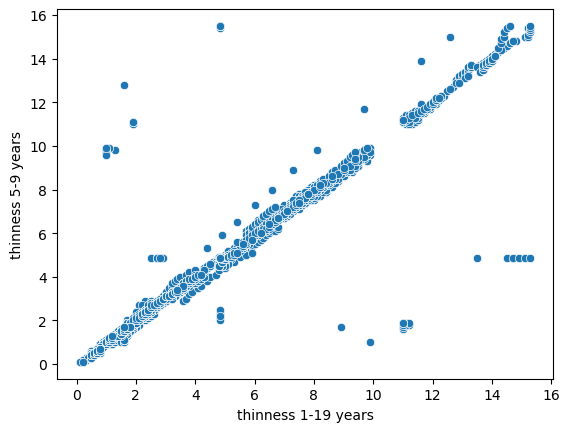

In [31]:
sns.scatterplot(x=data['thinness  1-19 years'], y=data['thinness 5-9 years'])
plt.xlabel('thinness 1-19 years')
plt.ylabel('thinness 5-9 years')
plt.show()

In [32]:
data = data.drop(columns=["thinness 5-9 years", "infant deaths"])

# Modeling

In [33]:
# tools
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# models
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

# Splitting data

In [34]:
X = data.drop(columns=["Life expectancy","Year", "Country"])
y = data["Life expectancy"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (2350, 17)
The Shape of y_train is : (2350,)
The Shape of X_test is : (588, 17)
The Shape of y_test is : (588,)


# Preprocessing Categorical Columns

In [36]:
cat_col = [col for col in X.columns if X[col].dtype == 'object']
print(cat_col)

['Status']


In [37]:
encoder = LabelEncoder()

X_train['Status'] = encoder.fit_transform(X_train['Status'])
X_test['Status'] = encoder.transform(X_test['Status'])

# Preprocessing Numerical Columns

In [46]:
num_cols = [col for col in X.columns if X[col].dtype != 'object']
feature = X_train[num_cols]
print(num_cols)

['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


ValueError: num must be an integer with 1 <= num <= 12, not 13

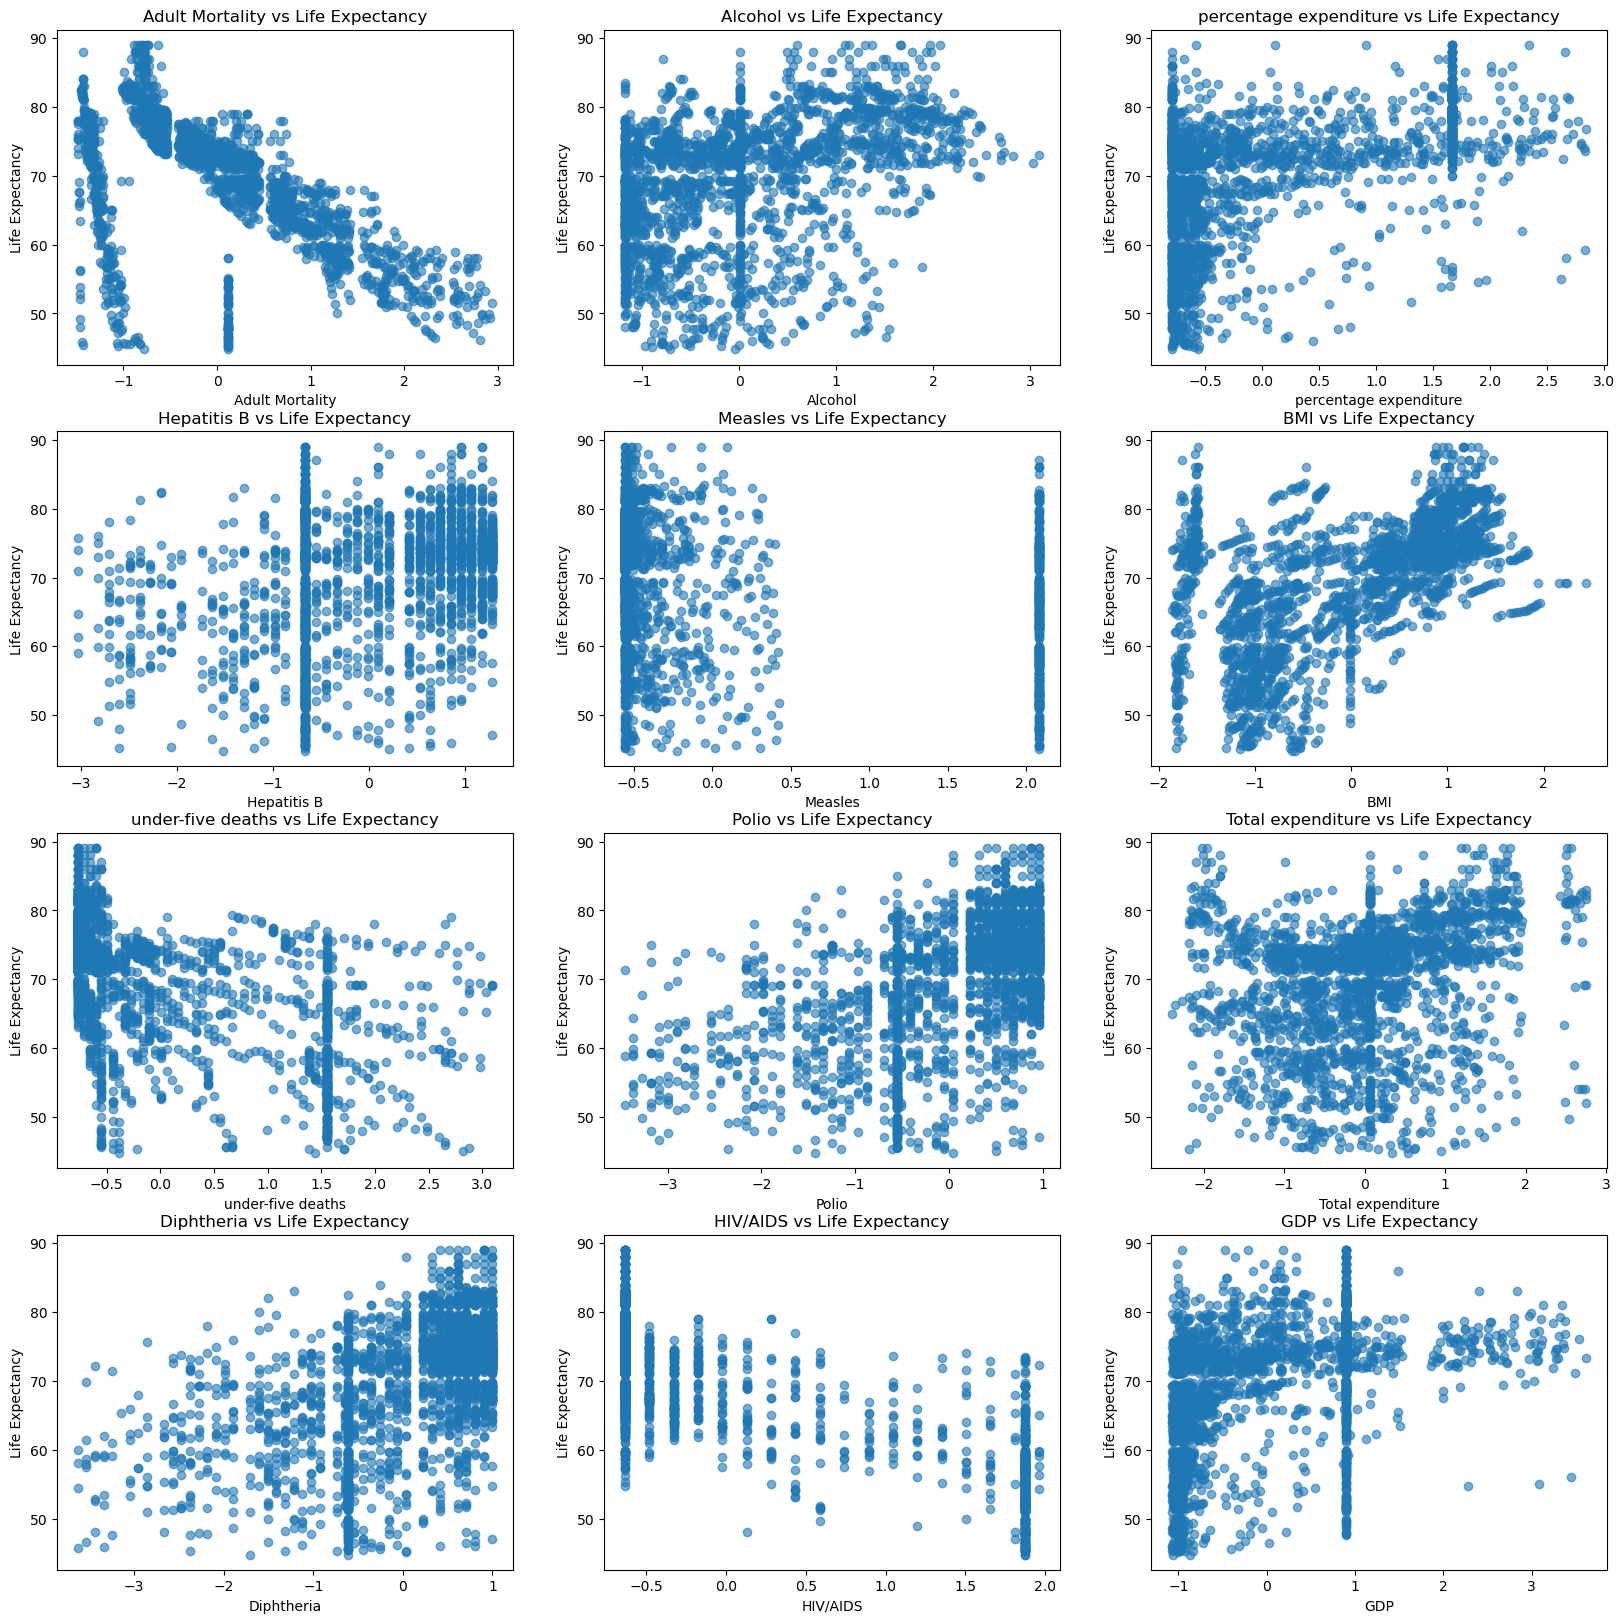

In [51]:
plt.figure(figsize=(20, 20))

# Loop through each feature and plot against fare
for i, col in enumerate(feature.columns):
    plt.subplot(4, 3, i + 1)  # 3 rows, 4 columns
    plt.scatter(feature[col], y_train, alpha=0.6)
    plt.title(f'{col} vs Life Expectancy')
    plt.xlabel(col)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(feature.shape[1]):
    vif.append(variance_inflation_factor(feature,i))

In [54]:
pd.DataFrame({'vif':vif},index=feature.columns).T

,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
vif,1.530353,1.629001,1.758348,2.229094,1.402334,1.754264,2.170963,4.780087,1.242351,5.188696,2.219212,1.699279,1.262057,1.805877,7.282096,4.842255


In [39]:
sc = StandardScaler()

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [40]:
X_train.head()

,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
456,1,-0.266785,0.179640,0.358192,0.962694,-0.556288,-0.654211,-0.770370,0.871708,-0.694075,0.900165,0.130365,-0.252880,-0.914701,1.132173,-0.353790,-0.097849
462,1,-0.012620,-0.199357,-0.290869,-0.662547,-0.556288,-0.824603,-0.770370,0.226975,-0.279818,-0.610845,0.435789,-0.738794,-0.921246,1.519640,-0.613341,-0.412867
2172,1,-0.100601,1.507416,-0.793342,1.286457,-0.556288,0.297983,-0.770370,0.963813,0.832626,0.996556,-0.633196,0.899267,0.964546,-0.000422,0.496239,0.252170
2667,1,-1.371424,-0.849064,1.188790,1.178536,-0.538840,1.039691,-0.604906,0.871708,0.683679,0.900165,-0.633196,0.033699,-0.818476,0.625486,0.411885,0.882206
381,1,-0.569828,-1.148136,2.345640,1.286457,-0.556288,-0.528922,-0.770370,0.963813,-1.112987,0.514603,-0.633196,3.367336,0.964546,0.714901,1.060762,0.392178


# Feature Importance

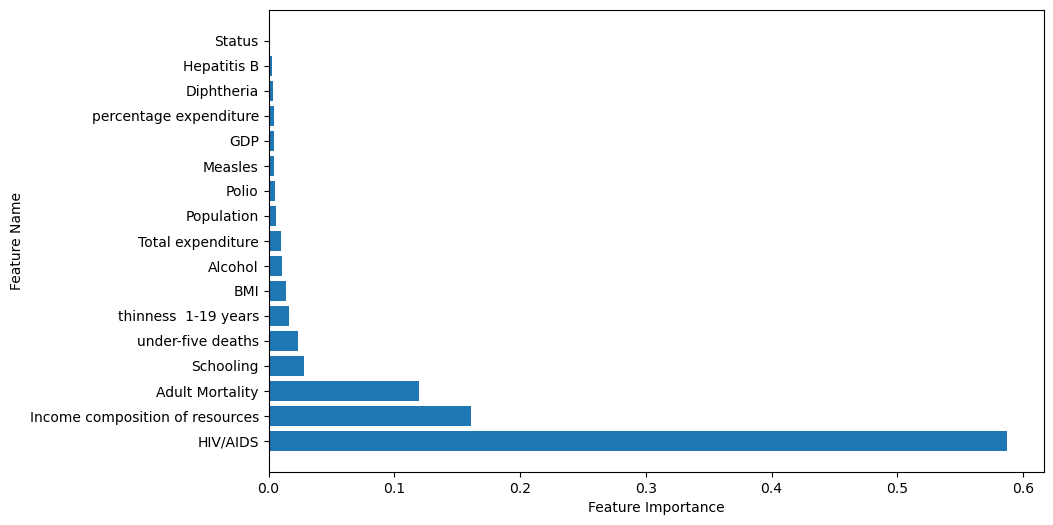

In [41]:
# Create and train a Random Forest classifier
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
# plt.title('Feature Importance')
plt.show()

# Models

In [42]:
model_name= []
RMSE = []
R2_score = []

models = [
    DecisionTreeRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    LinearRegression(),
    ExtraTreeRegressor(random_state=42)
]

for model in models :
    model.fit(X_train , y_train)
    
    prediction = model.predict(X_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error( prediction , y_test, squared=False )))
    R2_score.append(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [55]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,R2_Score
Model-Name,,
RandomForestRegressor,2.268425518076696,93.83380191653245 %
GradientBoostingRegressor,2.570709142916831,92.08092770090728 %
ExtraTreeRegressor,3.1069702852758936,88.4324170322339 %
DecisionTreeRegressor,3.4479716637540756,85.75390619302993 %
LinearRegression,3.662069971056189,83.92978452897542 %


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')

print("R² Scores for each fold:", scores)
print("Best R² Score:", np.max(scores))
print("Average R² Score:", np.mean(scores))

R² Scores for each fold: [0.84429592 0.88296957 0.85442204 0.8729922  0.87190442]
Best R² Score: 0.8829695707008803
Average R² Score: 0.8653168287874579


In [66]:
score_1 = cross_val_score(RandomForestRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')

print("R² Scores for each fold:", score_1)
print("Best R² Score:", np.max(score_1))
print("Average R² Score:", np.mean(score_1))

R² Scores for each fold: [0.93241893 0.9355398  0.93080591 0.94101235 0.91109543]
Best R² Score: 0.9410123487490029
Average R² Score: 0.9301744832581079


In [68]:
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')

print("R² Scores for each fold:", scores)
print("Best R² Score:", np.max(scores))
print("Average R² Score:", np.mean(scores))

R² Scores for each fold: [0.80104351 0.81104351 0.80588087 0.83576484 0.79588441]
Best R² Score: 0.8357648415454746
Average R² Score: 0.8099234275862763
